## Анализ стоимости акций

In [1]:
!pip install -q yfinance
!pip install pandas_datareader

### Импорт библиотек, подготовка датасета

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_styly("whitegrid")
#plt.style.use("fivethirtyeiaght")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

end = datetime.now()

start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]

company_name = ["AAPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name

df = pd.concat(company_list, axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-28,146.979996,147.600006,145.529999,147.029999,147.029999,42711700,AMAZON
2023-11-29,147.850006,148.539993,145.970001,146.320007,146.320007,40610900,AMAZON
2023-11-30,144.759995,146.929993,144.330002,146.089996,146.089996,65814000,AMAZON
2023-12-01,146.000000,147.250000,145.550003,147.029999,147.029999,39924600,AMAZON
2023-12-04,145.250000,145.350006,142.809998,144.839996,144.839996,48294200,AMAZON
2023-12-05,143.550003,148.570007,143.130005,146.880005,146.880005,46822400,AMAZON
2023-12-06,147.580002,147.850006,144.279999,144.520004,144.520004,39679000,AMAZON
2023-12-07,146.149994,147.919998,145.339996,146.880005,146.880005,52352800,AMAZON
2023-12-08,145.479996,147.839996,145.399994,147.419998,147.419998,41858000,AMAZON


### Описательная статистика

In [4]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,163.037690,164.920219,161.323586,163.200100,162.275967,7.496862e+07
std,17.098585,16.829978,17.309808,17.066635,17.216682,2.624666e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,148.877495,150.924999,147.252502,149.362503,148.320213,5.527430e+07
50%,164.644997,166.340004,162.974998,165.045006,163.725906,7.018920e+07
75%,175.832504,177.562500,174.124996,175.715004,174.758205,8.798468e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.954327e+08


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2021-12-13 to 2023-12-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          502 non-null    float64
 1   High          502 non-null    float64
 2   Low           502 non-null    float64
 3   Close         502 non-null    float64
 4   Adj Close     502 non-null    float64
 5   Volume        502 non-null    int64  
 6   company_name  502 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.4+ KB


### Данные на момент закрытия биржи

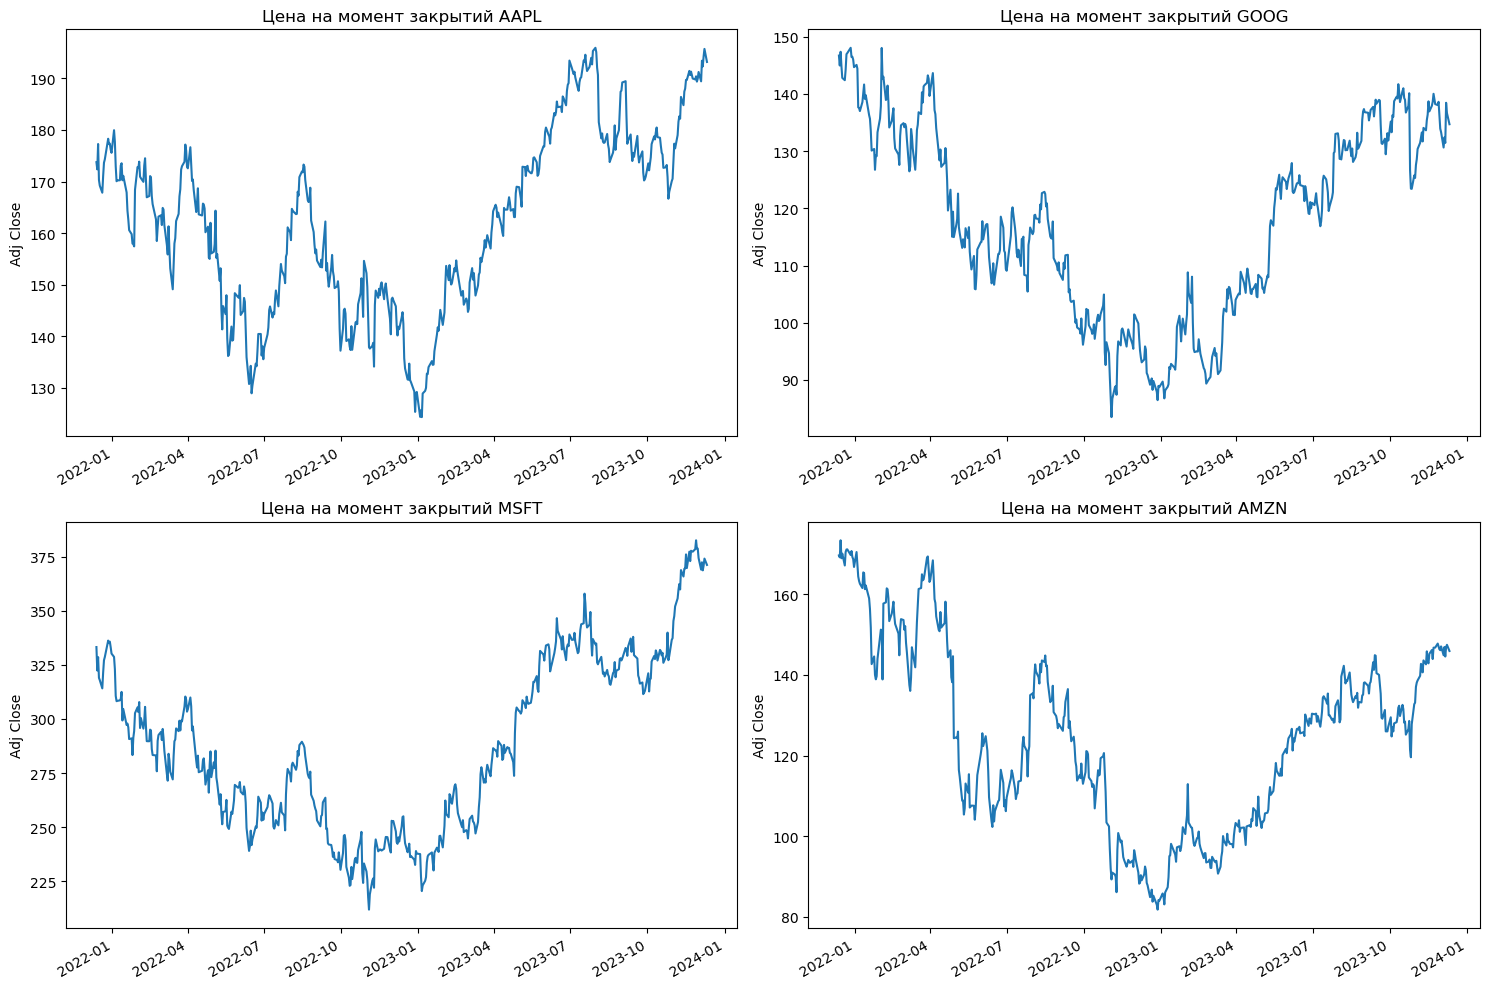

In [6]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2, i)
    company["Adj Close"].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title(f"Цена на момент закрытий {tech_list[i-1]}")

plt.tight_layout()

### Данные об объеме торгов

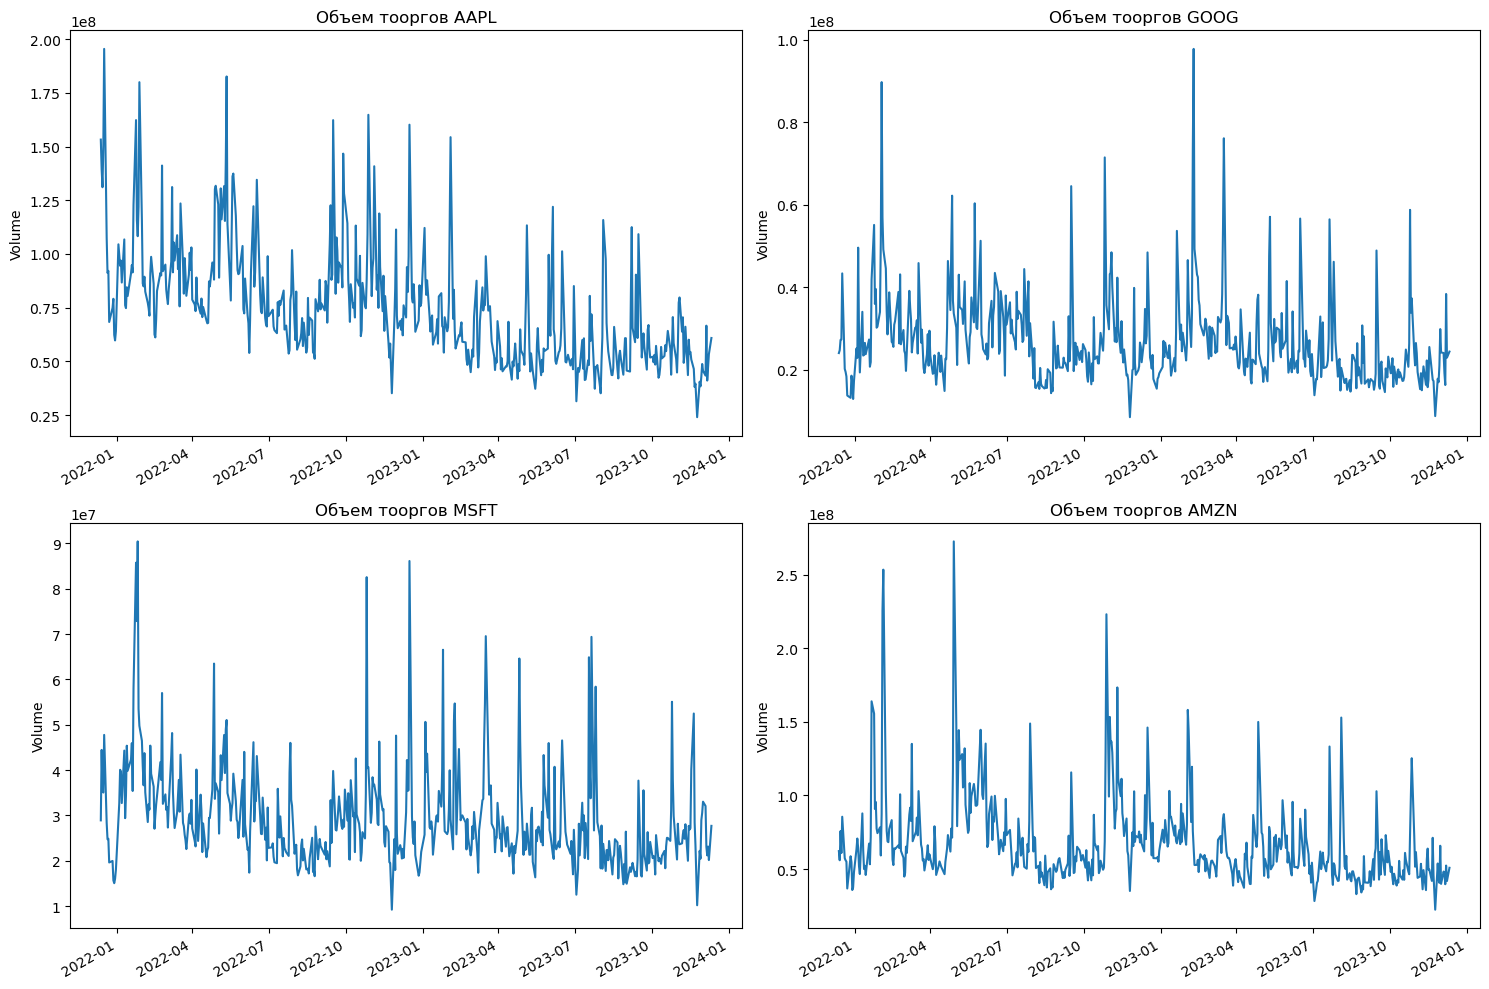

In [7]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2, i)
    company["Volume"].plot()
    plt.ylabel("Volume")
    plt.xlabel(None)
    plt.title(f"Объем тооргов {tech_list[i-1]}")

plt.tight_layout()

### Модель MA (Moving Average) скользящего среднего

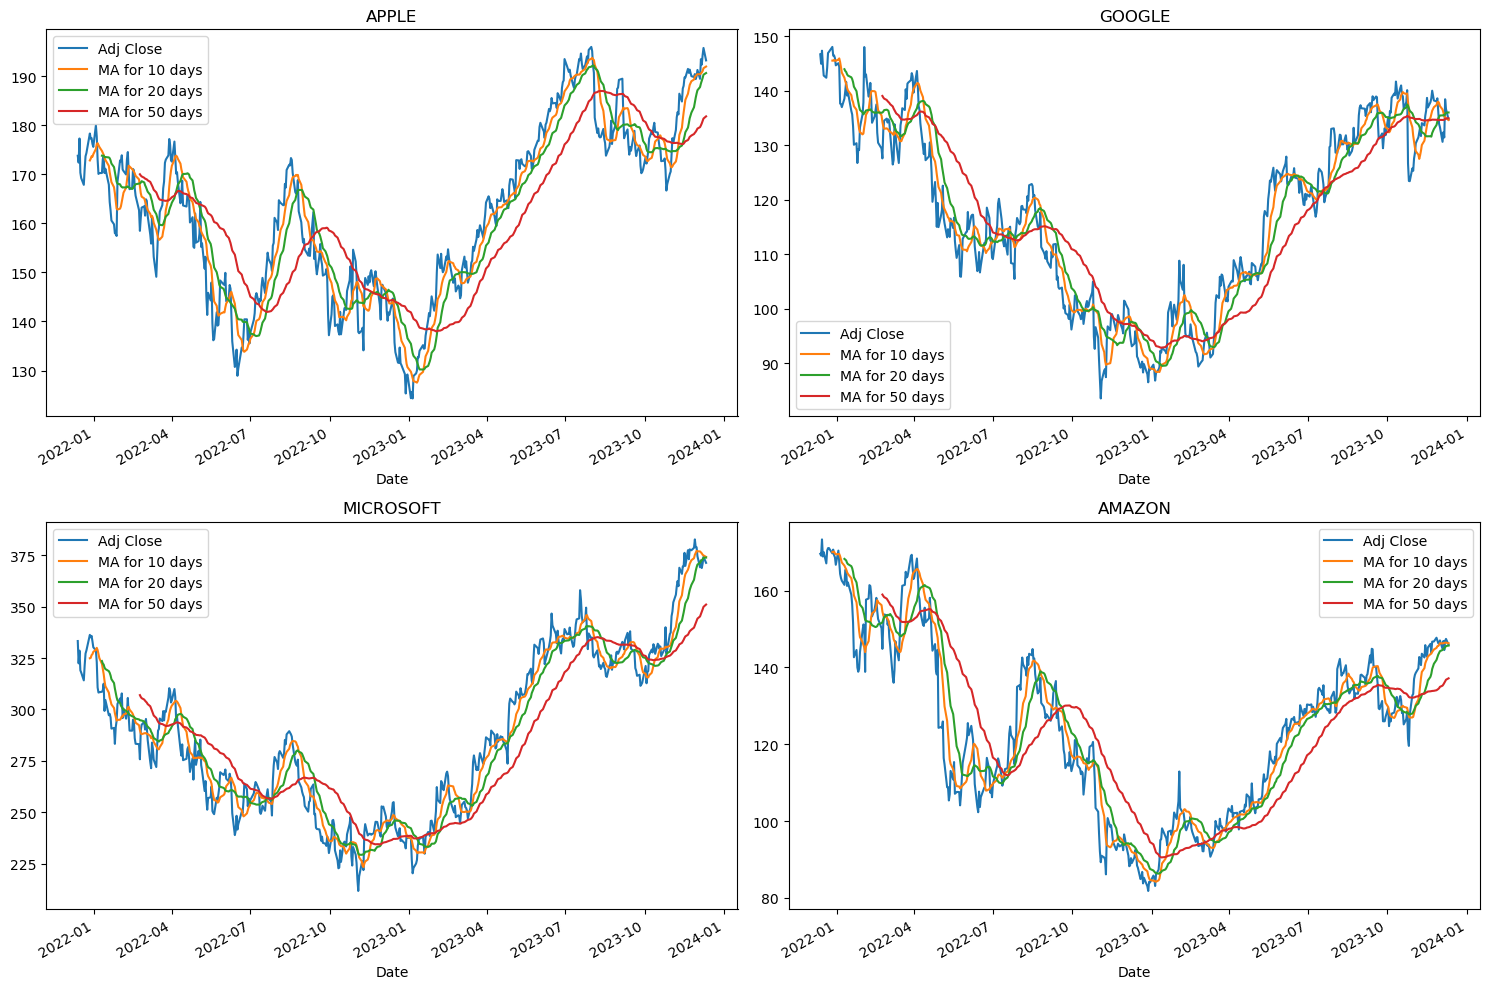

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### Дневные изменения

Text(0.5, 1.0, 'AMAZON')

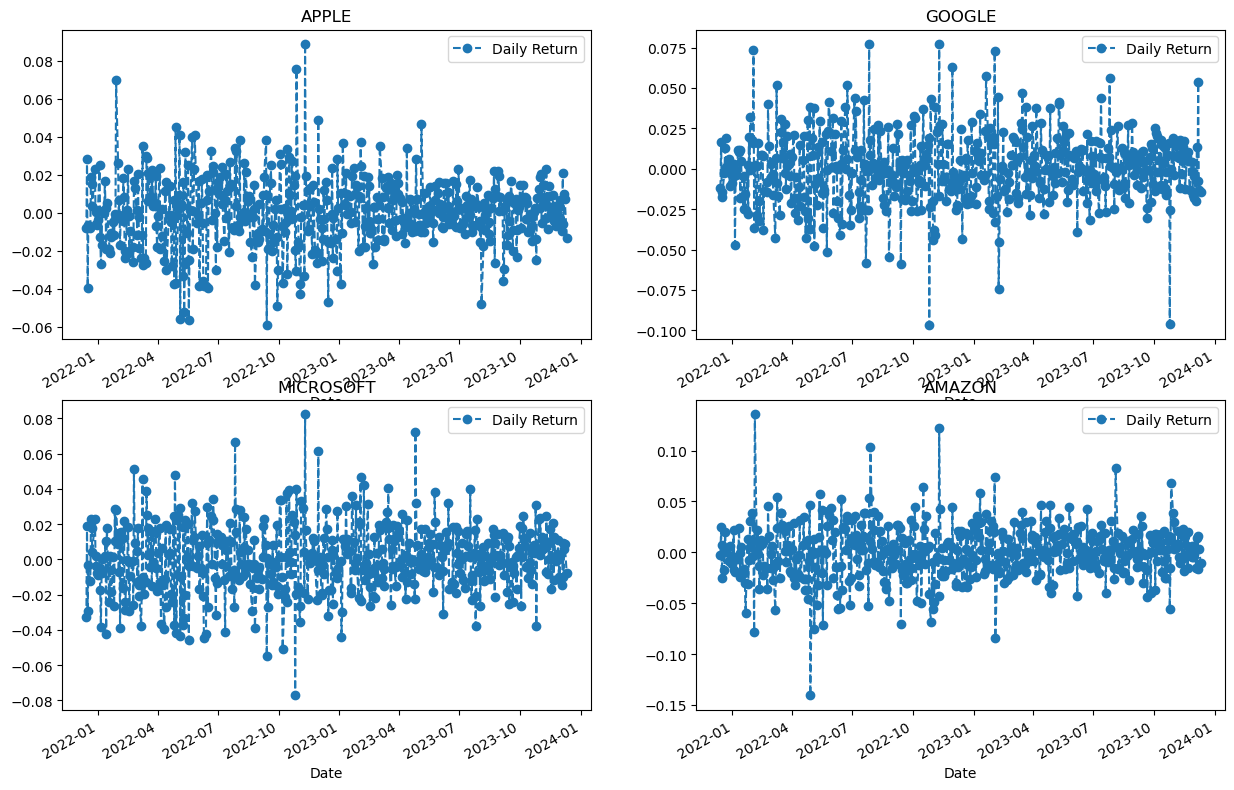

In [9]:
for company in company_list:
    company["Daily Return"] = company["Adj Close"].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL["Daily Return"].plot(ax=axes[0,0], legend=True, linestyle="--", marker="o")
axes[0,0].set_title("APPLE")

GOOG["Daily Return"].plot(ax=axes[0,1], legend=True, linestyle="--", marker="o")
axes[0,1].set_title("GOOGLE")

MSFT["Daily Return"].plot(ax=axes[1,0], legend=True, linestyle="--", marker="o")
axes[1,0].set_title("MICROSOFT")

AMZN["Daily Return"].plot(ax=axes[1,1], legend=True, linestyle="--", marker="o")
axes[1,1].set_title("AMAZON")

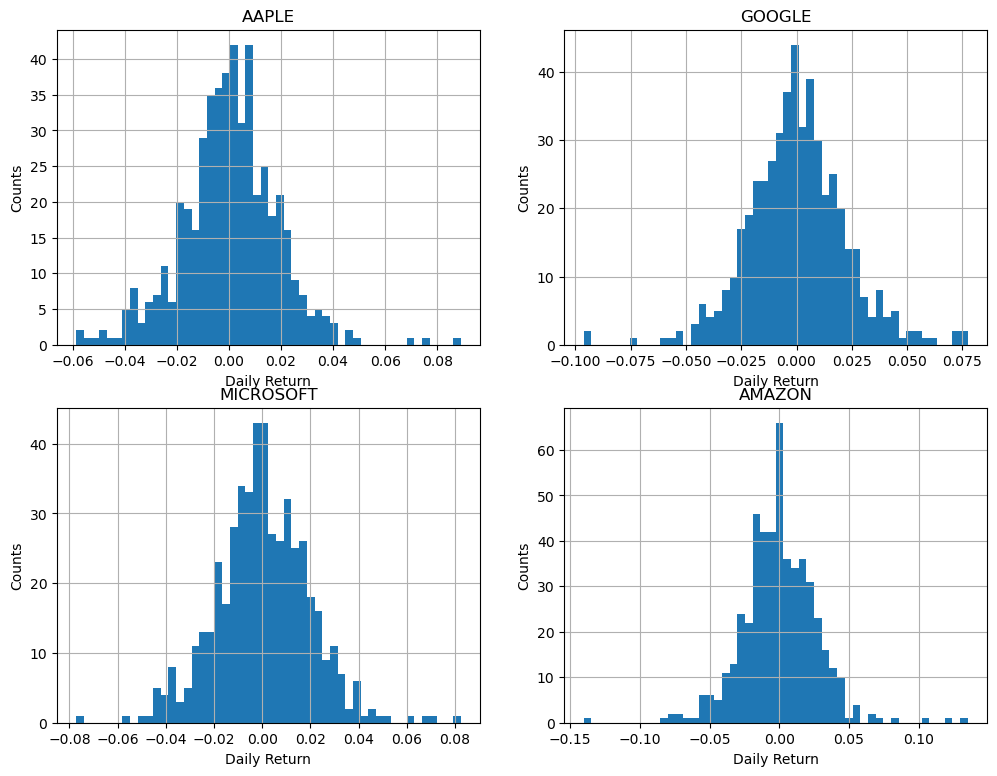

In [10]:
plt.figure(figsize=(12,9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company["Daily Return"].hist(bins=50)
    plt.xlabel("Daily Return")
    plt.ylabel("Counts")
    plt.title(f"{company_name[i-1]}")

fig.tight_layout()

### Корреляция стоимости акций

In [12]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)["Adj Close"]

tech_rets = closing_df.pct_change()
tech_rets.head(10)

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-12-13,NaN,NaN,NaN,NaN
2021-12-14,-0.008023,-0.002807,-0.011820,-0.032587
2021-12-15,0.028509,0.024978,0.016541,0.019218
2021-12-16,-0.039264,-0.025641,-0.017168,-0.029135
2021-12-17,-0.006502,0.006789,-0.014054,-0.003386
2021-12-20,-0.008122,-0.017284,-0.002811,-0.012014
2021-12-21,0.019087,0.019979,0.012774,0.023069
2021-12-22,0.015319,0.003638,0.018919,0.018057
2021-12-23,0.003644,0.000184,0.001317,0.004472


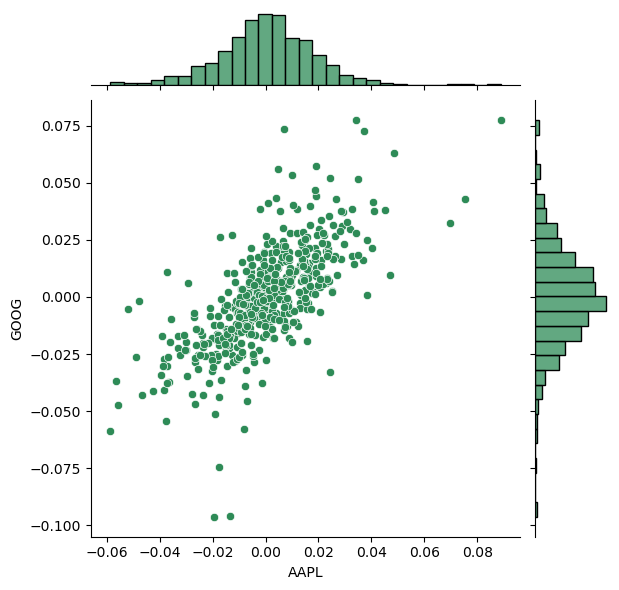

In [13]:
sns.jointplot(x="AAPL", y="GOOG", data=tech_rets, kind="scatter", color="seagreen")

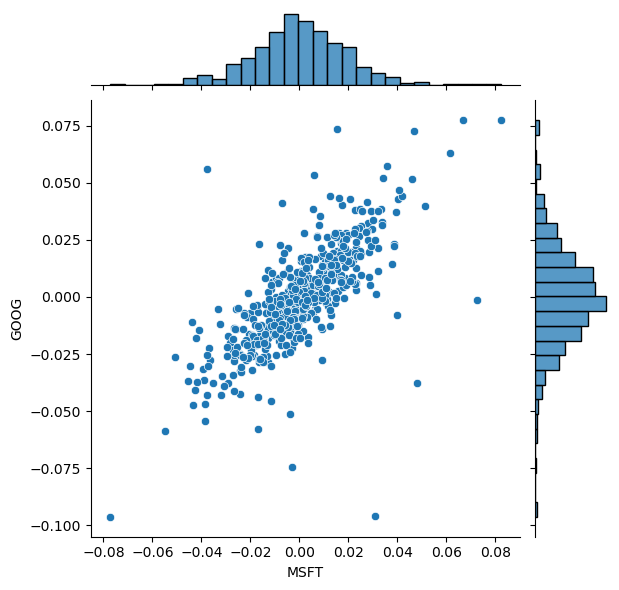

In [14]:
sns.jointplot(x="MSFT", y="GOOG", data=tech_rets, kind="scatter")

/Library/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


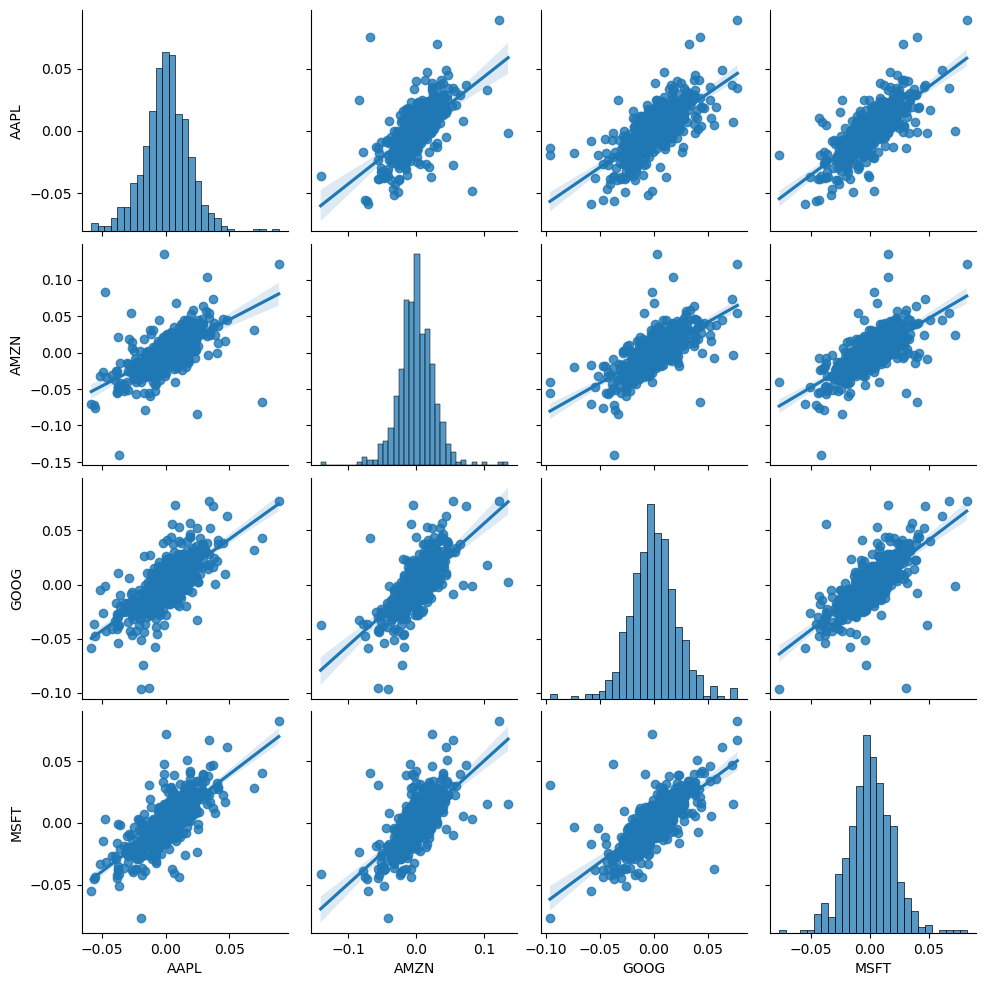

In [15]:
sns.pairplot(tech_rets, kind="reg")

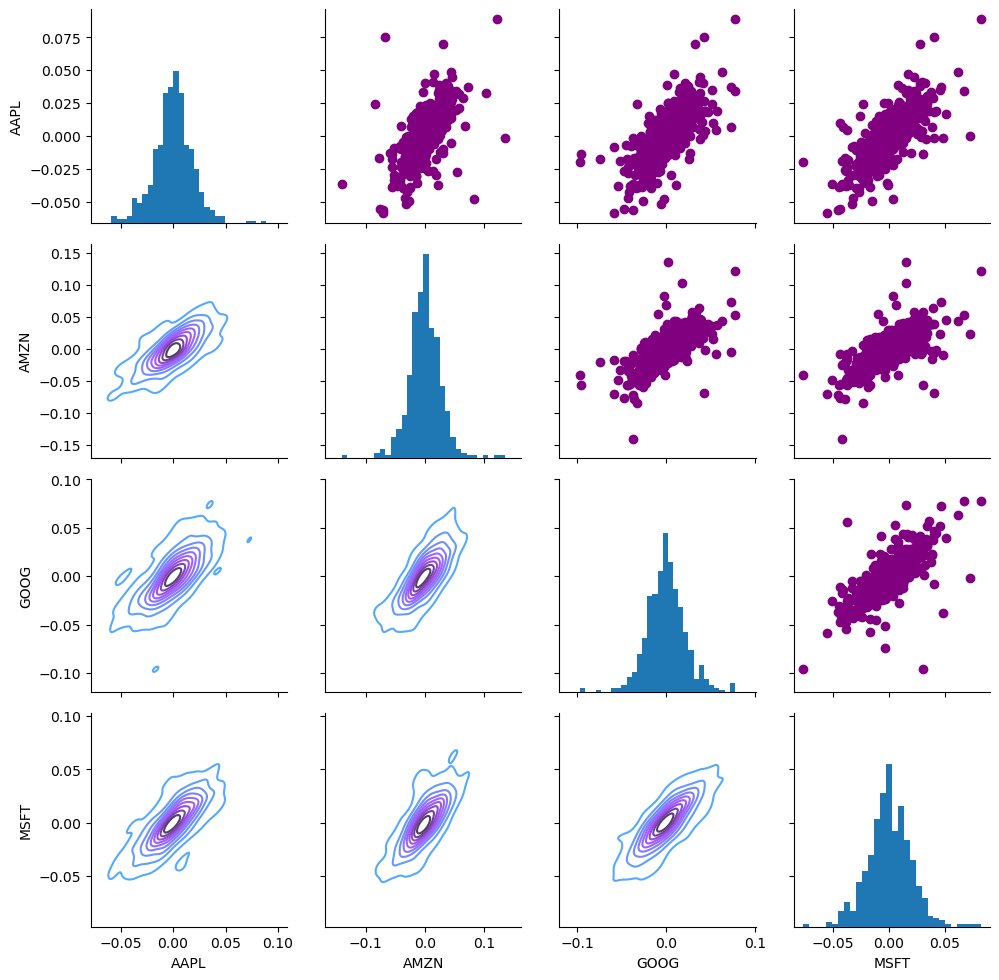

In [17]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color="purple")
return_fig.map_lower(sns.kdeplot, cmap="cool_d")
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

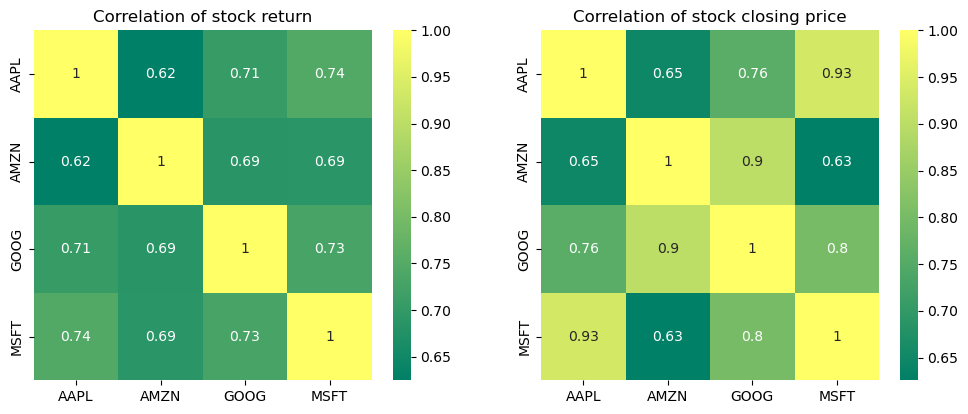

In [18]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap="summer")
plt.title("Correlation of stock return")

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap="summer")
plt.title("Correlation of stock closing price")

### Предсказание данных цены зарытия акций Apple 

In [19]:
df = pdr.get_data_yahoo("AAPL", start="2012-01-01", end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449686,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516596,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655555,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787856,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400
...,...,...,...,...,...,...
2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400
2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700
2023-12-07,193.630005,195.000000,193.589996,194.270004,194.270004,47477700


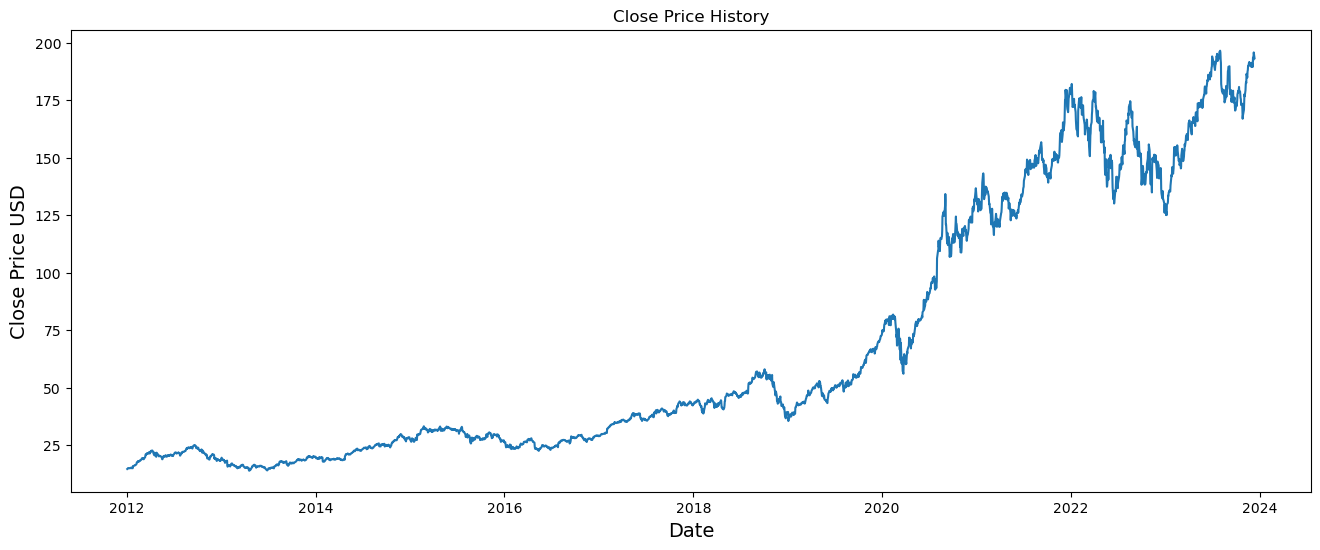

In [20]:
plt.figure(figsize=(16,6))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price USD", fontsize=14)
plt.show()

In [21]:
data = df.filter(["Close"])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)*0.95))

training_data_len

2855

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.988055  ],
       [0.99594531],
       [0.98208241]])

In [27]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()


[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [28]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Предсказание с использованием LSTM

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer="adam", loss= "mean_squared_error")

model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
2795/2795 [==============================] - 56s 19ms/step - loss: 0.0011
Epoch 2/3
2795/2795 [==============================] - 54s 19ms/step - loss: 5.3857e-04
Epoch 3/3
2795/2795 [==============================] - 54s 19ms/step - loss: 3.8276e-04


In [32]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 17ms/step


9.912995852122936

/var/folders/24/z61d72zx27z5ml8twybhwmm40000gn/T/ipykernel_70911/2603199341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


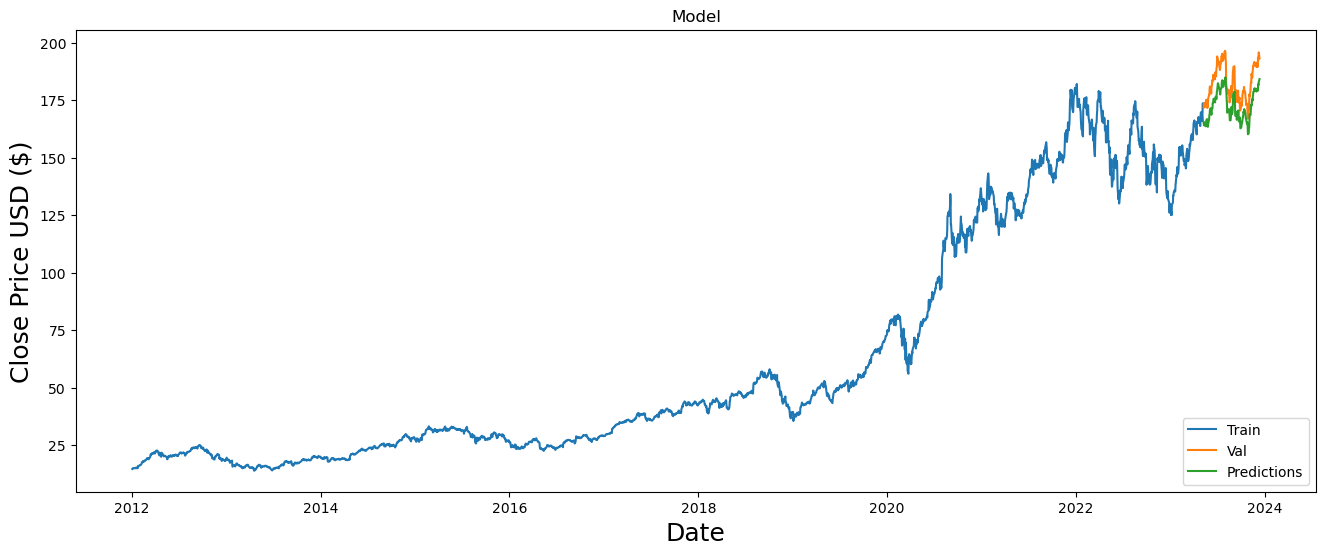

In [34]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()